In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip

unzip:  cannot find or open /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip, /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.zip or /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.ZIP.


In [ ]:
airline_data=pd.read_csv('/content/drive/MyDrive/AirlinePassenger_Dataset/airline_passenger_satisfaction.csv')

In [ ]:
airline_data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
airline_data.tail()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied
129879,129880,Female,20,Returning,Personal,Economy Plus,337,0,0.0,1,...,4,2,4,2,2,2,3,2,1,Neutral or Dissatisfied


In [ ]:
airline_data.shape

(129880, 24)

In [ ]:
airline_data.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [ ]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [ ]:
airline_data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
airline_data.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [ ]:
airline_data = airline_data.dropna()

In [ ]:
airline_data.shape

(129487, 24)

In [ ]:
airline_data.nunique()

ID                                        129487
Gender                                         2
Age                                           75
Customer Type                                  2
Type of Travel                                 2
Class                                          3
Flight Distance                             3821
Departure Delay                              464
Arrival Delay                                472
Departure and Arrival Time Convenience         6
Ease of Online Booking                         6
Check-in Service                               6
Online Boarding                                6
Gate Location                                  6
On-board Service                               6
Seat Comfort                                   6
Leg Room Service                               6
Cleanliness                                    6
Food and Drink                                 6
In-flight Service                              6
In-flight Wifi Servi

In [ ]:
airline_data.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [ ]:
airline_data1 = airline_data[['Gender', 'Age', 'Customer Type', 'Type of Travel',
'Class','Departure and Arrival Time Convenience',
'Ease of Online Booking','Check-in Service',
'Online Boarding', 'Gate Location',
'On-board Service', 'Seat Comfort', 'Leg Room Service',
'Cleanliness', 'Food and Drink', 'In-flight Service',
'In-flight Wifi Service','In-flight Entertainment',
'Baggage Handling', 'Satisfaction']]

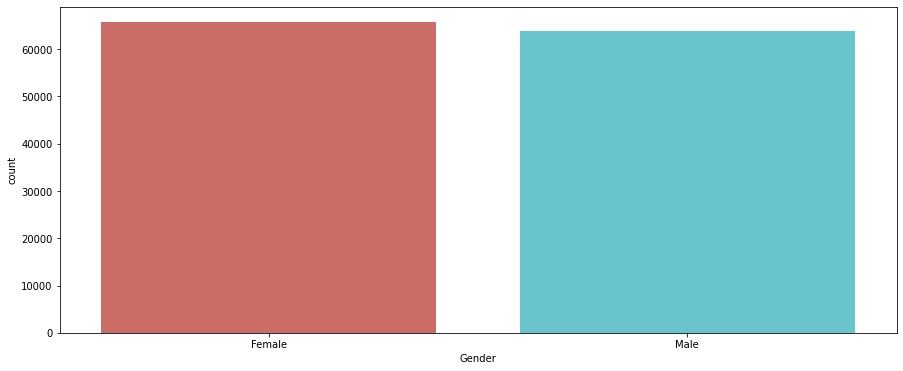

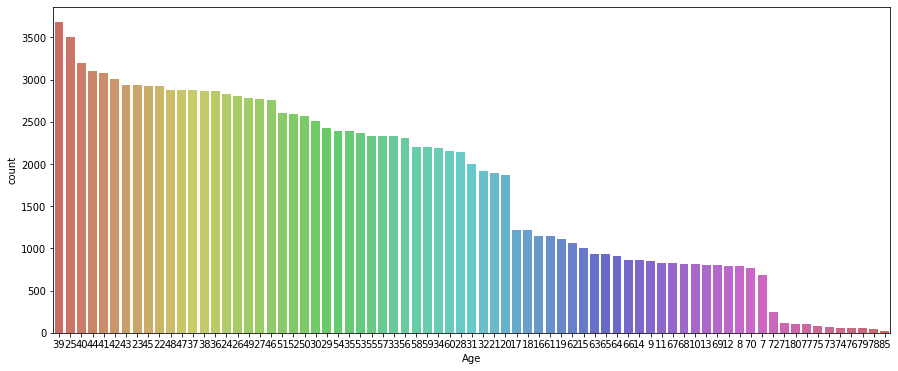

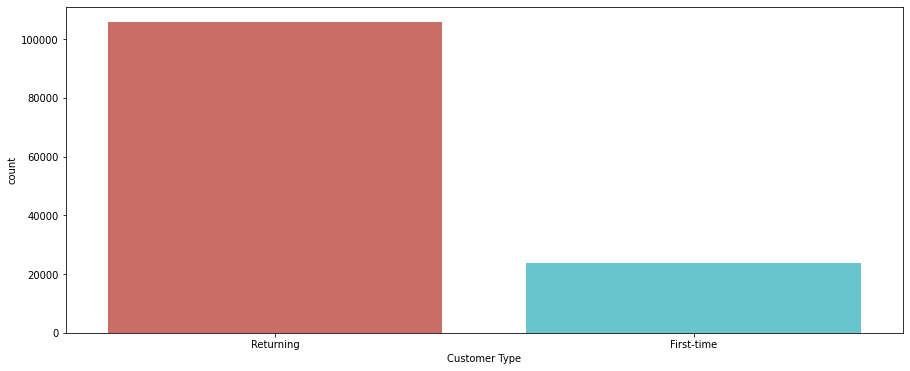

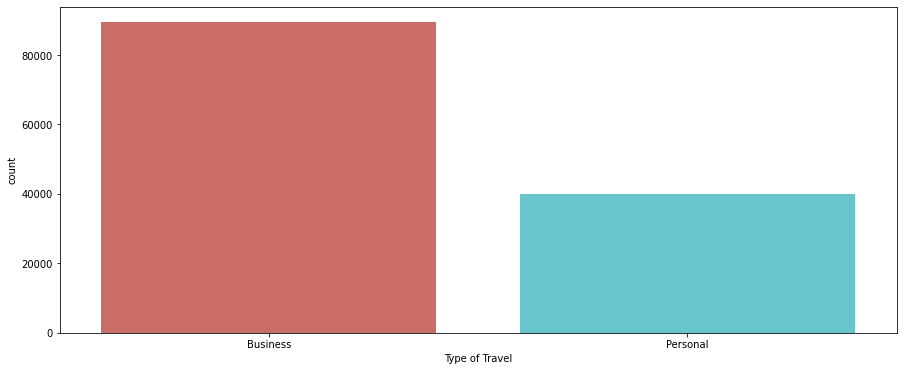

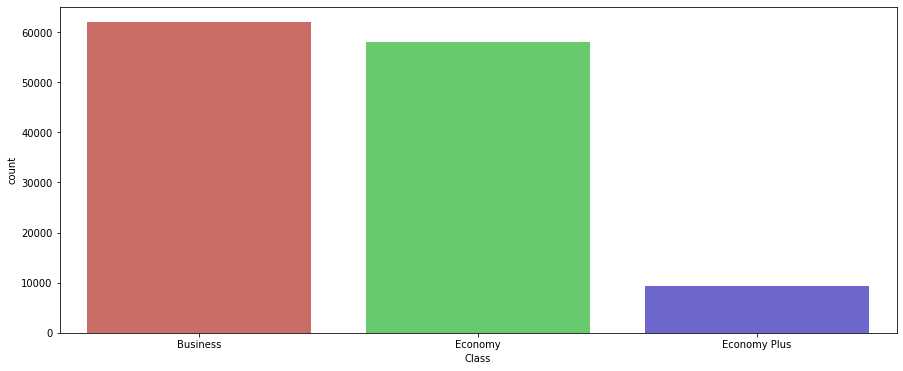

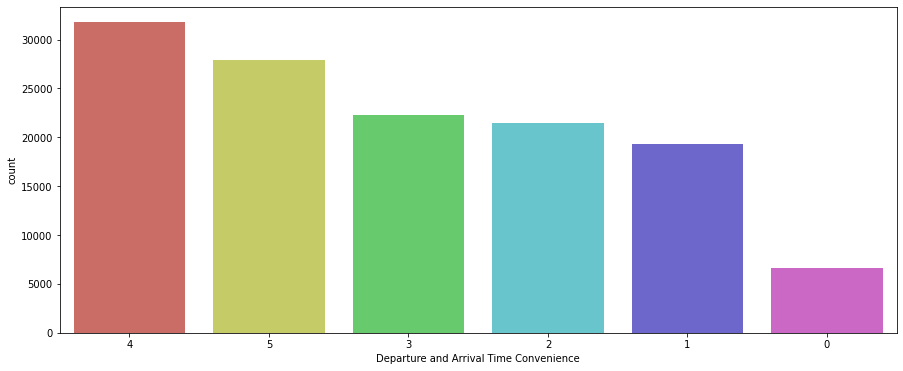

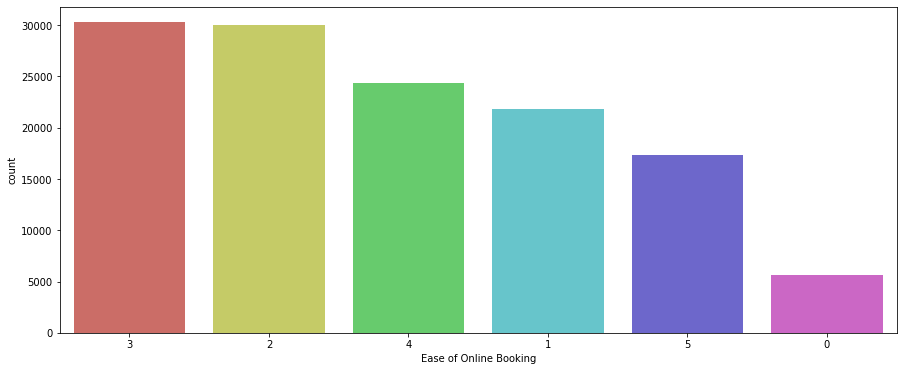

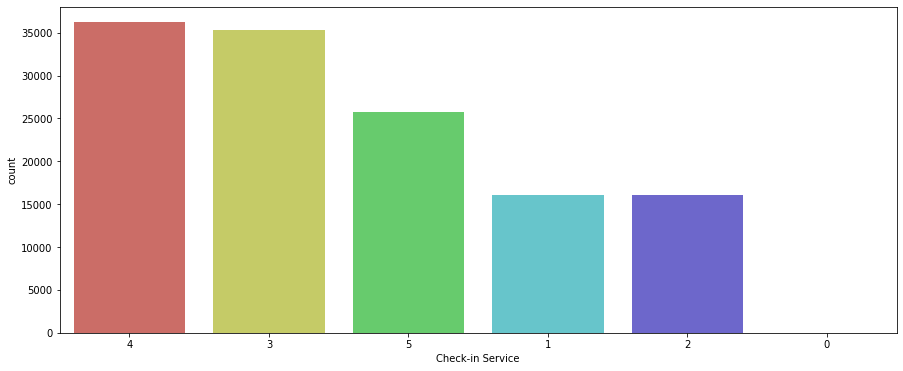

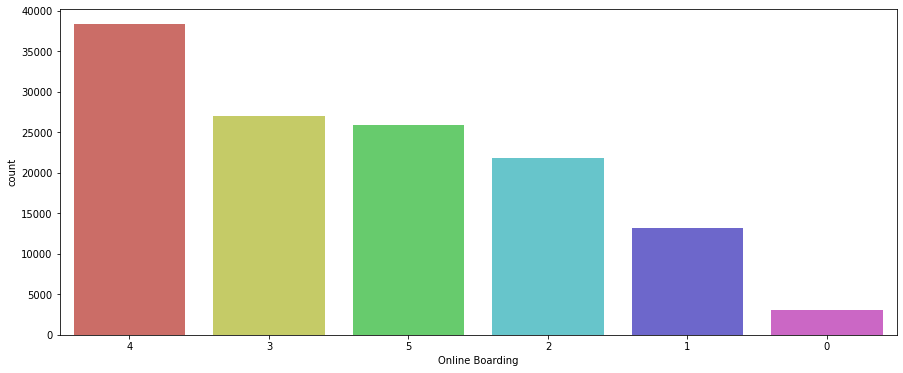

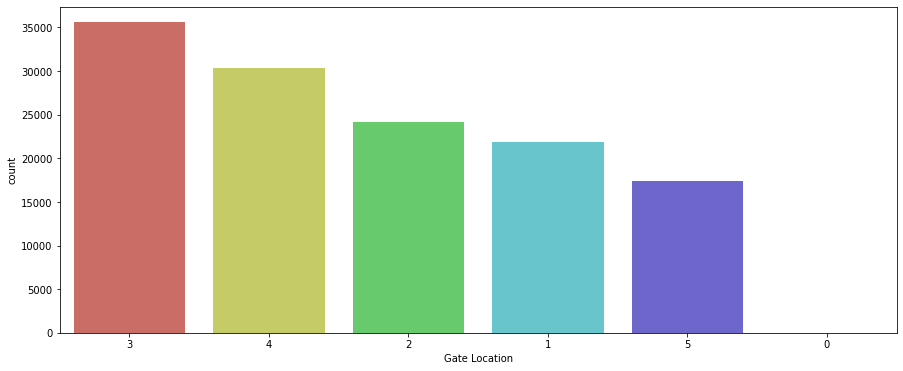

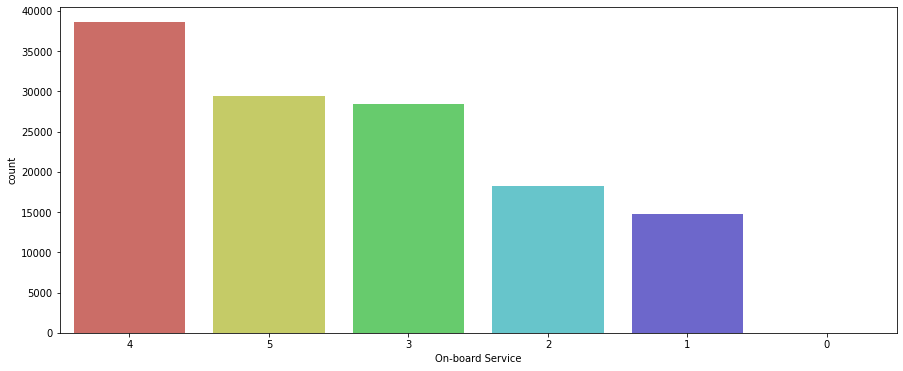

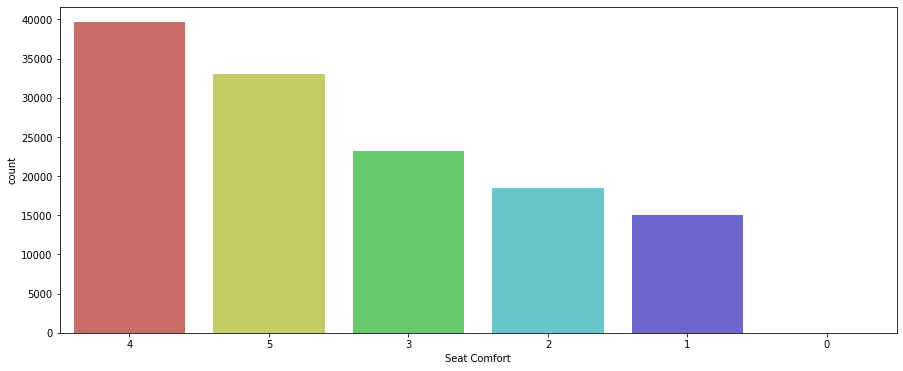

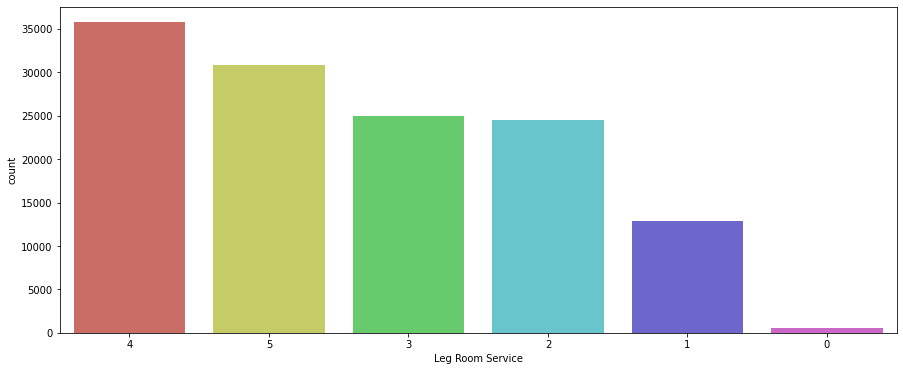

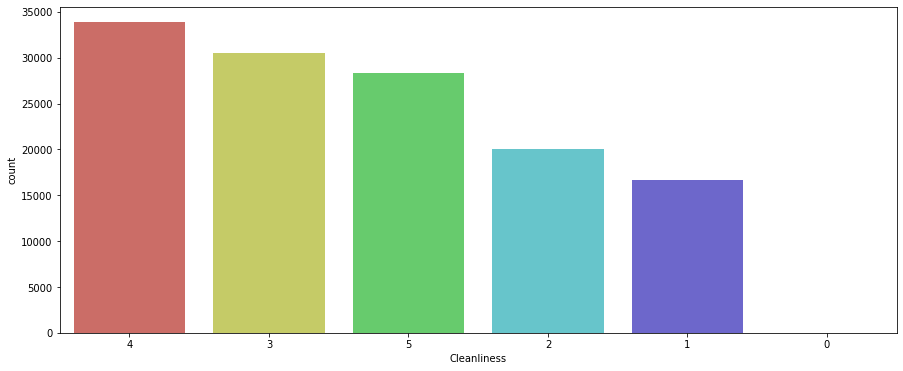

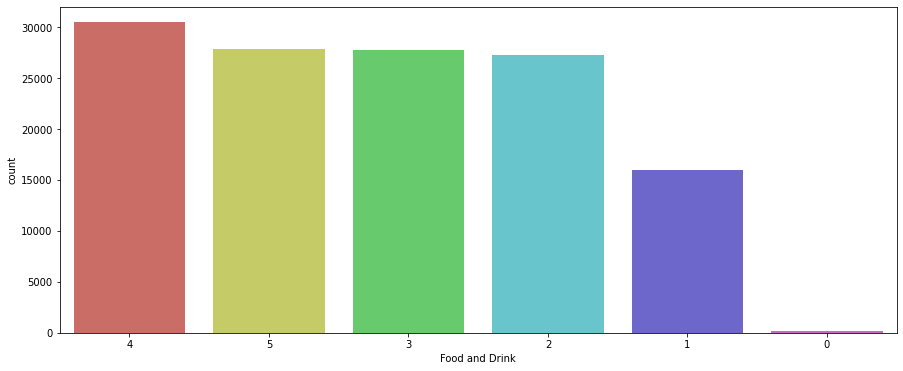

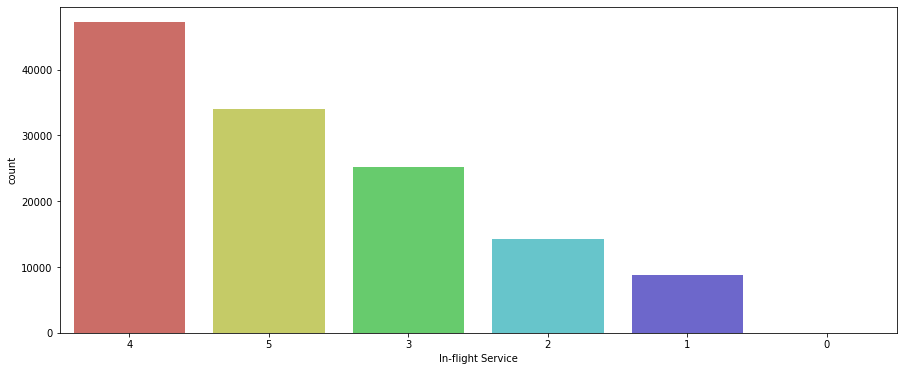

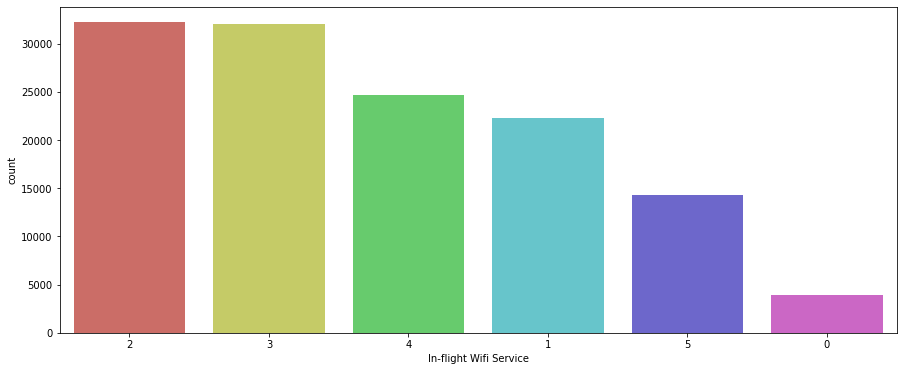

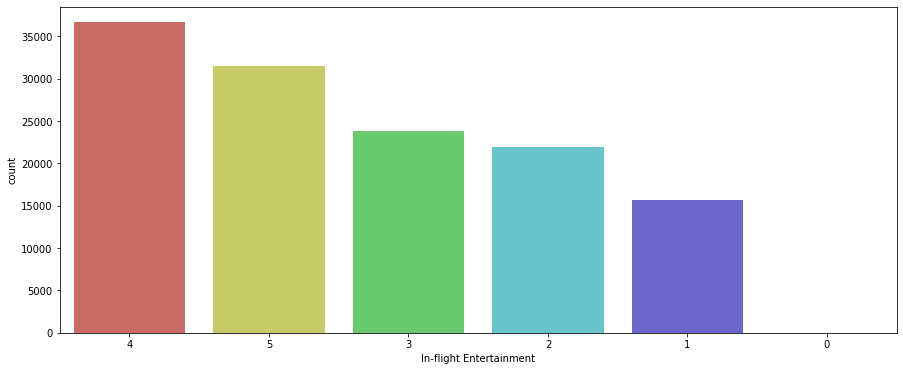

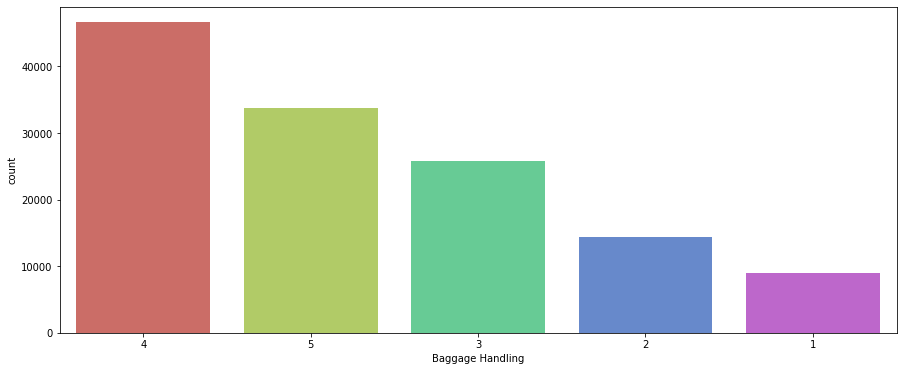

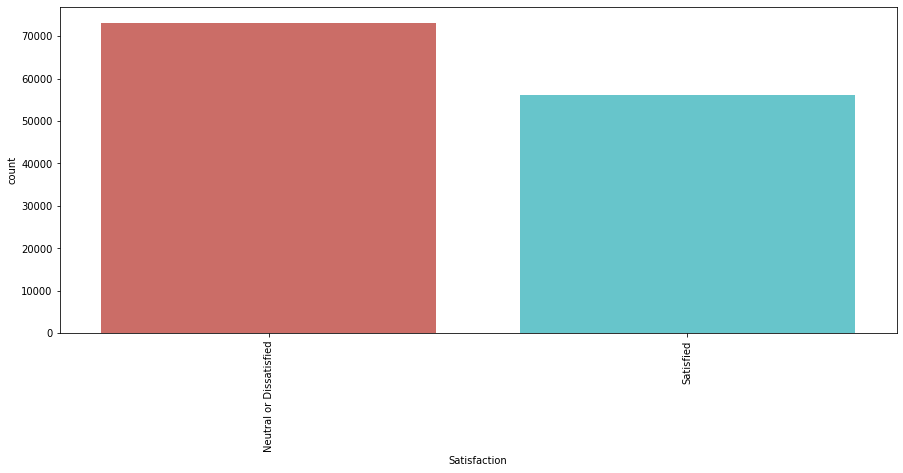

In [ ]:
for i in airline_data1.columns:
  plt.figure(figsize=(15,6))
  sns.countplot(x = airline_data1[i][1:],data=airline_data1.iloc[1:],
  order=airline_data1[i][1:].value_counts().index,
  palette='hls')
plt.xticks(rotation = 90)
plt.show()

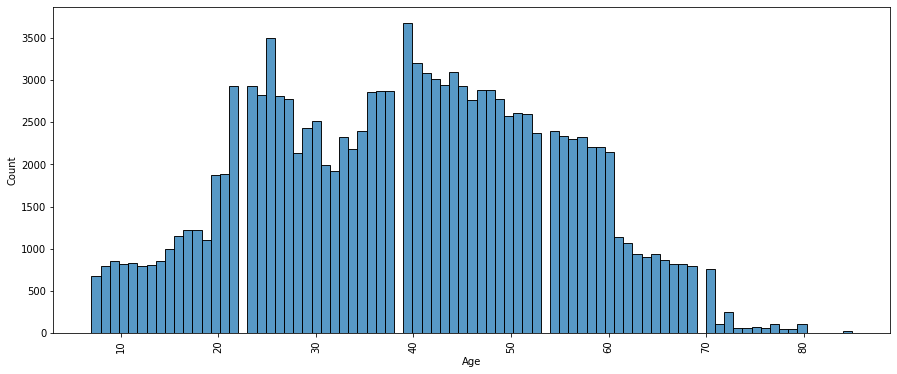

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(airline_data1['Age'], palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
airline_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 20 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   Gender                                  129487 non-null  object
 1   Age                                     129487 non-null  int64 
 2   Customer Type                           129487 non-null  object
 3   Type of Travel                          129487 non-null  object
 4   Class                                   129487 non-null  object
 5   Departure and Arrival Time Convenience  129487 non-null  int64 
 6   Ease of Online Booking                  129487 non-null  int64 
 7   Check-in Service                        129487 non-null  int64 
 8   Online Boarding                         129487 non-null  int64 
 9   Gate Location                           129487 non-null  int64 
 10  On-board Service                        129487 non-null 

In [ ]:
airline_data1.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [ ]:
airline_data2 = airline_data1[['Departure and Arrival Time Convenience',
'Ease of Online Booking',
'Check-in Service', 'Online Boarding', 'Gate Location',
'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
'In-flight Entertainment', 'Baggage Handling']]


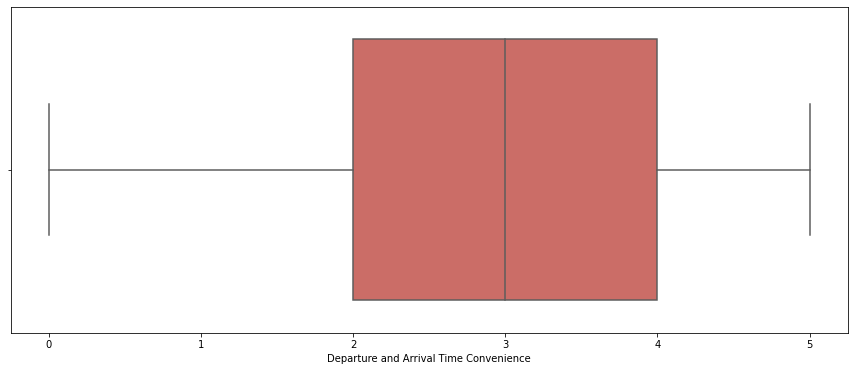

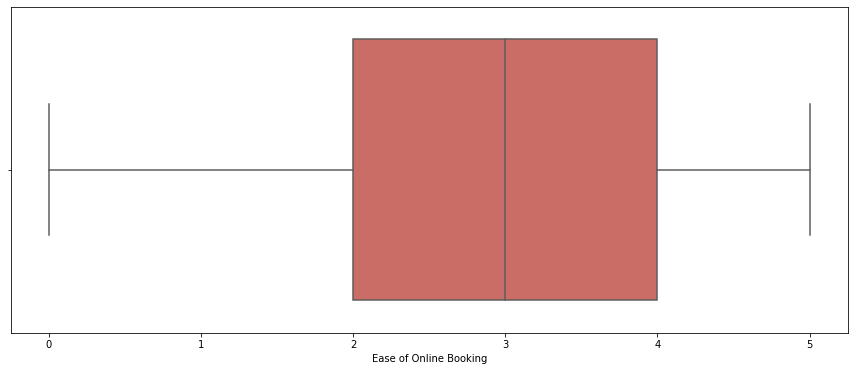

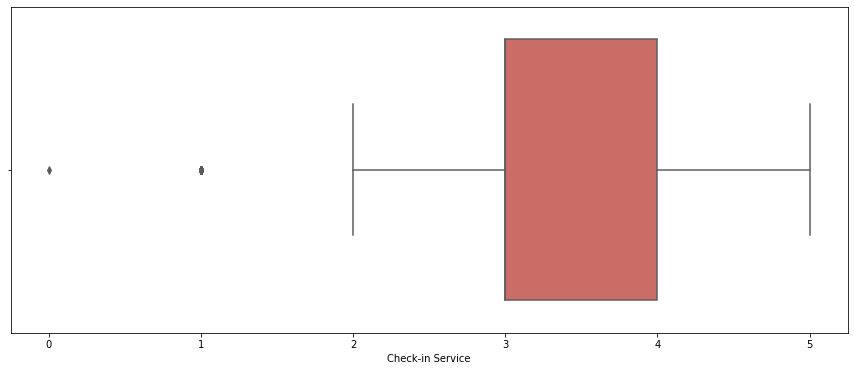

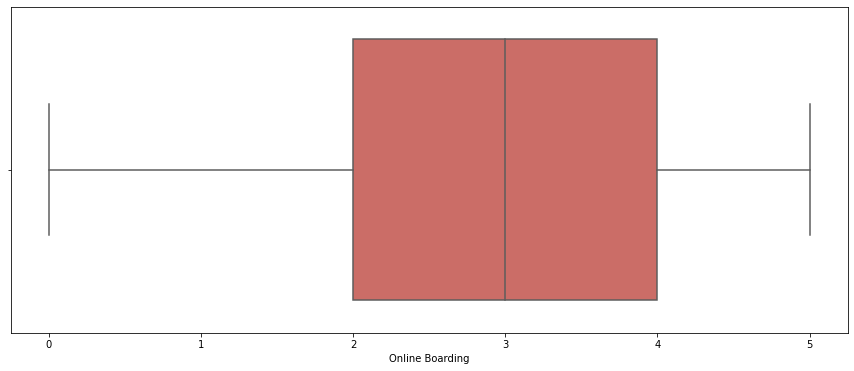

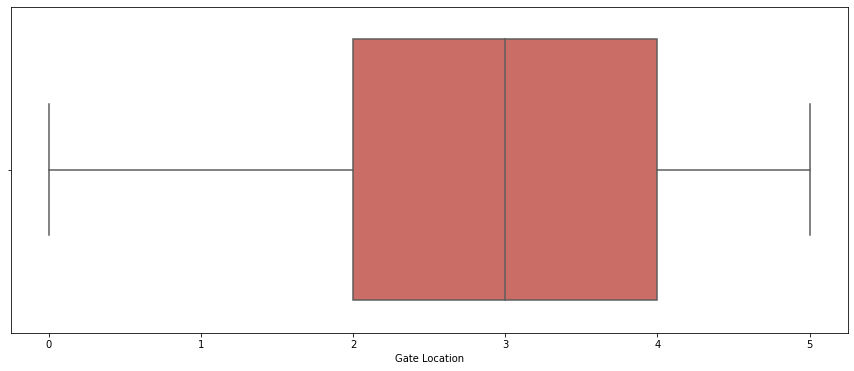

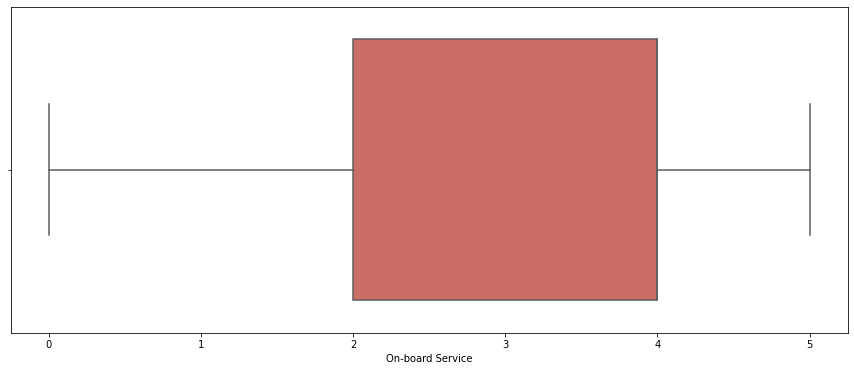

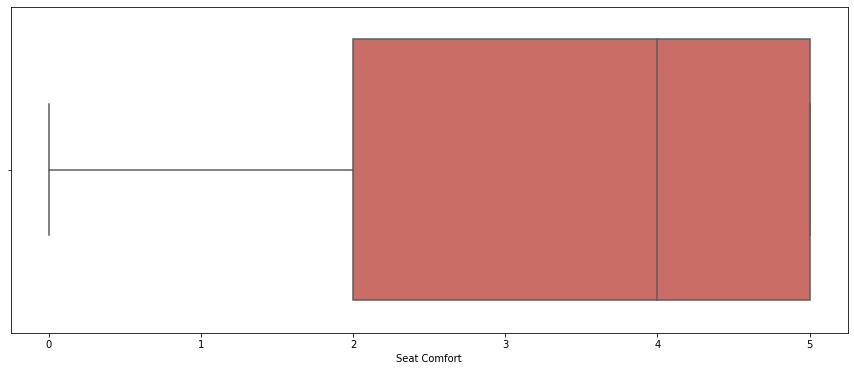

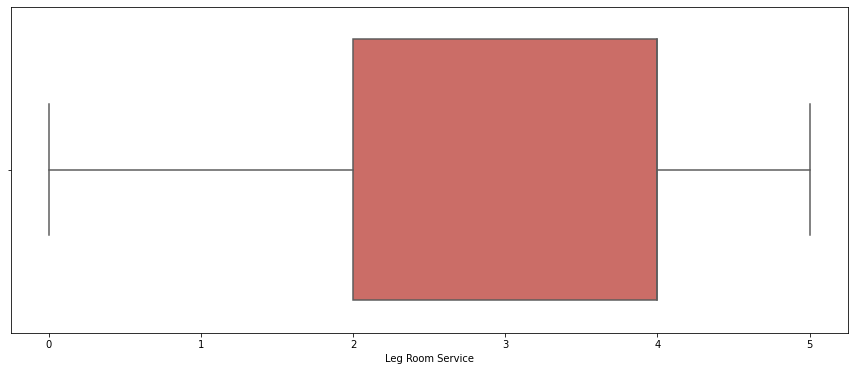

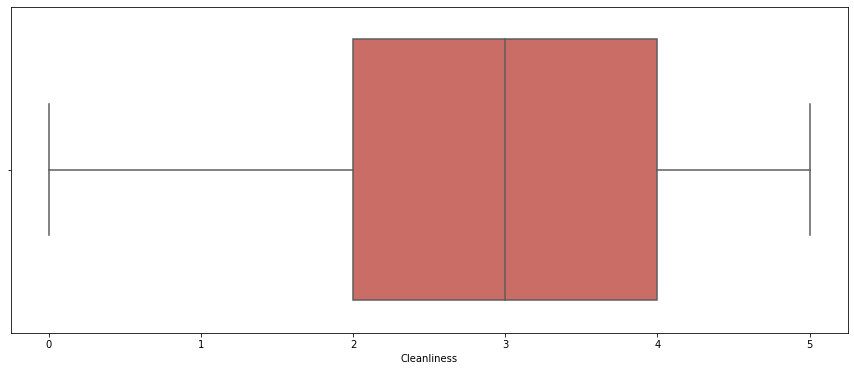

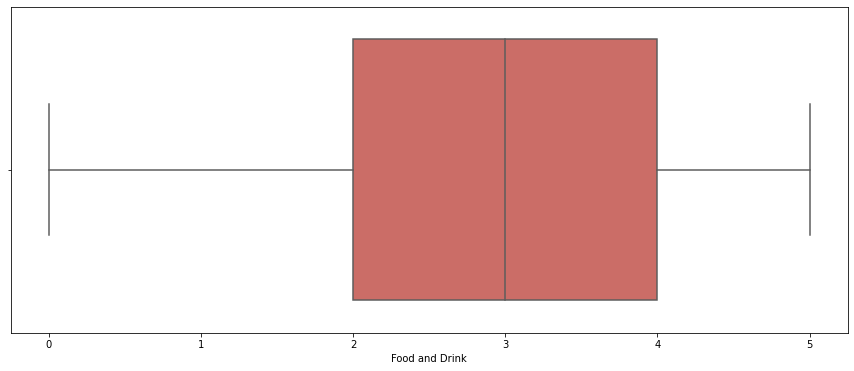

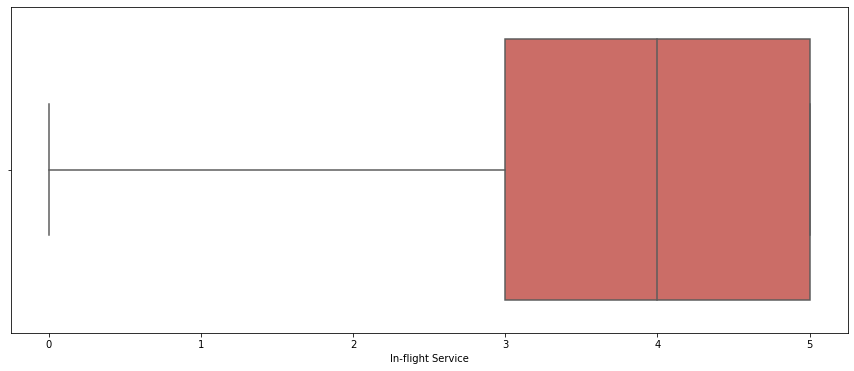

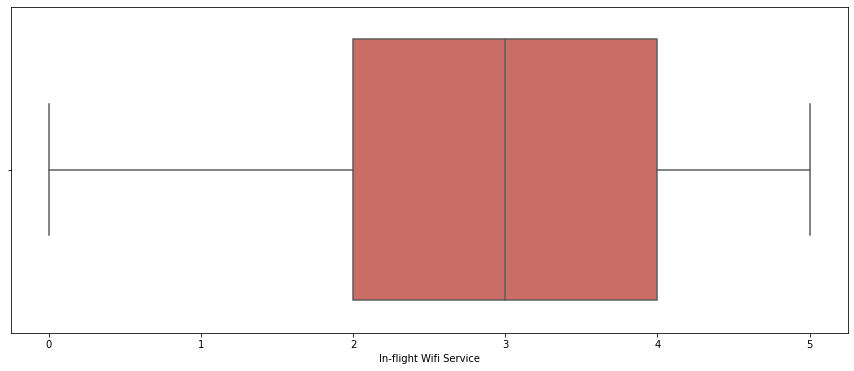

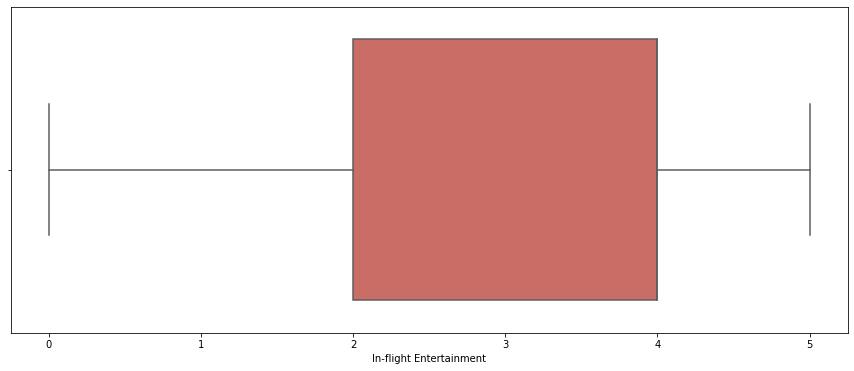

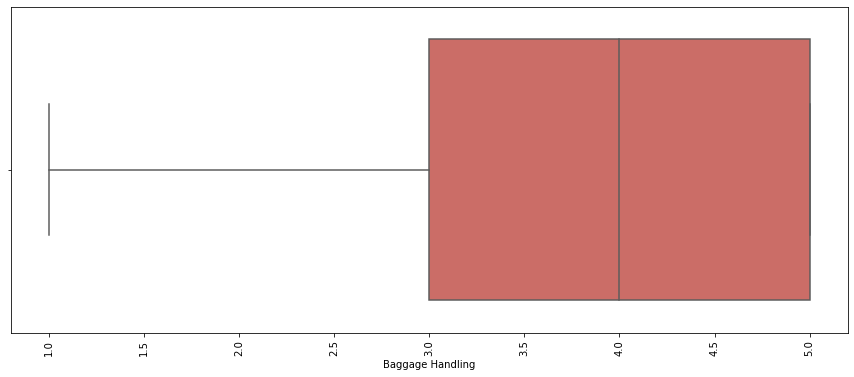

In [ ]:
for j in airline_data2.columns:
  plt.figure(figsize=(15,6))
  sns.boxplot(x = airline_data2[j][1:],data=airline_data2.iloc[1:],
  order=airline_data2[j][1:].value_counts().index,
  palette='hls')
plt.xticks(rotation = 90)
plt.show()

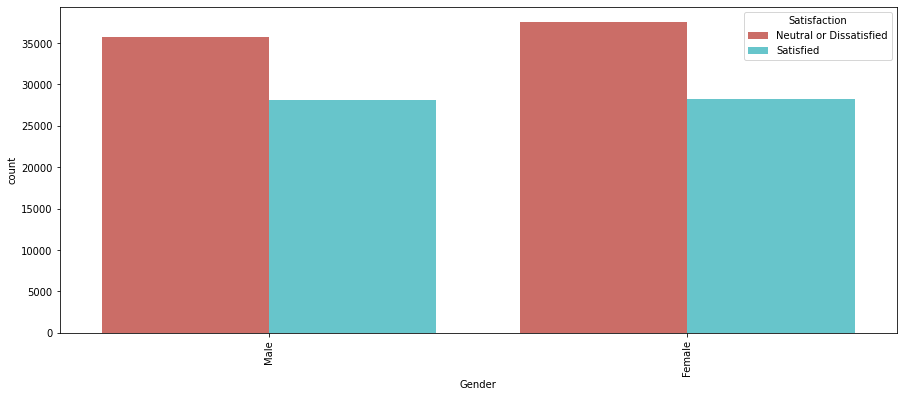

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('Gender', hue = 'Satisfaction',
data = airline_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

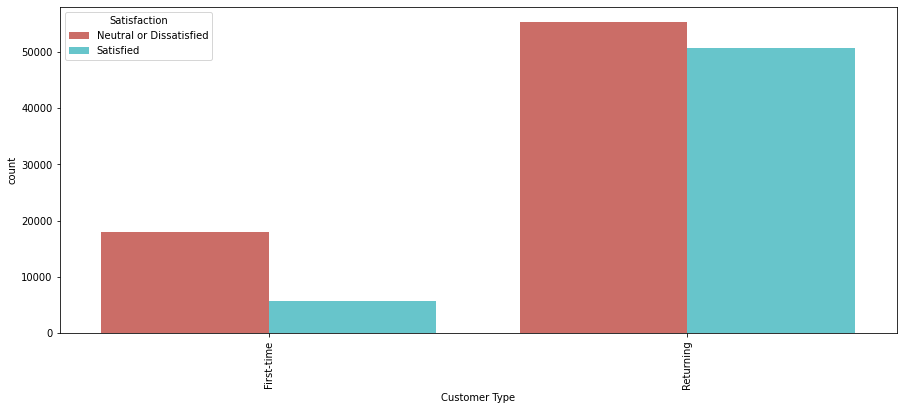

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('Customer Type', hue = 'Satisfaction',
data = airline_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

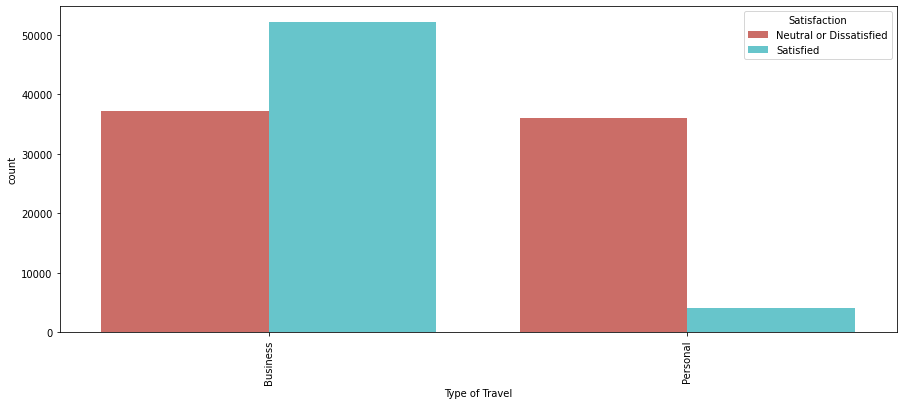

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('Type of Travel', hue = 'Satisfaction',
data = airline_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

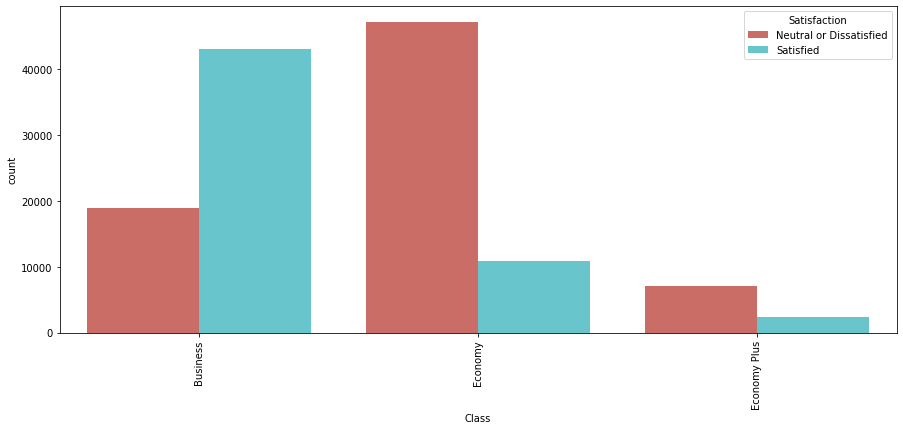

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('Class', hue = 'Satisfaction',
data = airline_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
airline_data3 = airline_data[['Gender', 'Customer Type', 'Type of Travel',
'Class', 'Satisfaction']]


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


In [ ]:
airline_data3.loc[:,:] = airline_data3.loc[:,:].apply(label_encoder.fit_transform)

In [ ]:
airline_data3.head()

,Gender,Customer Type,Type of Travel,Class,Satisfaction
0,1,0,0,0,0
1,0,1,0,0,1
2,1,1,0,0,1
3,1,1,0,0,1
4,0,1,0,0,1


In [ ]:
airline_data[list(airline_data3.columns)] = airline_data3
airline_data = airline_data.apply(pd.to_numeric, errors='coerce')
airline_data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,48,0,0,0,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,0
1,2,0,35,1,0,0,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,1
2,3,1,41,1,0,0,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,1
3,4,1,50,1,0,0,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,1
4,5,0,49,1,0,0,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,1


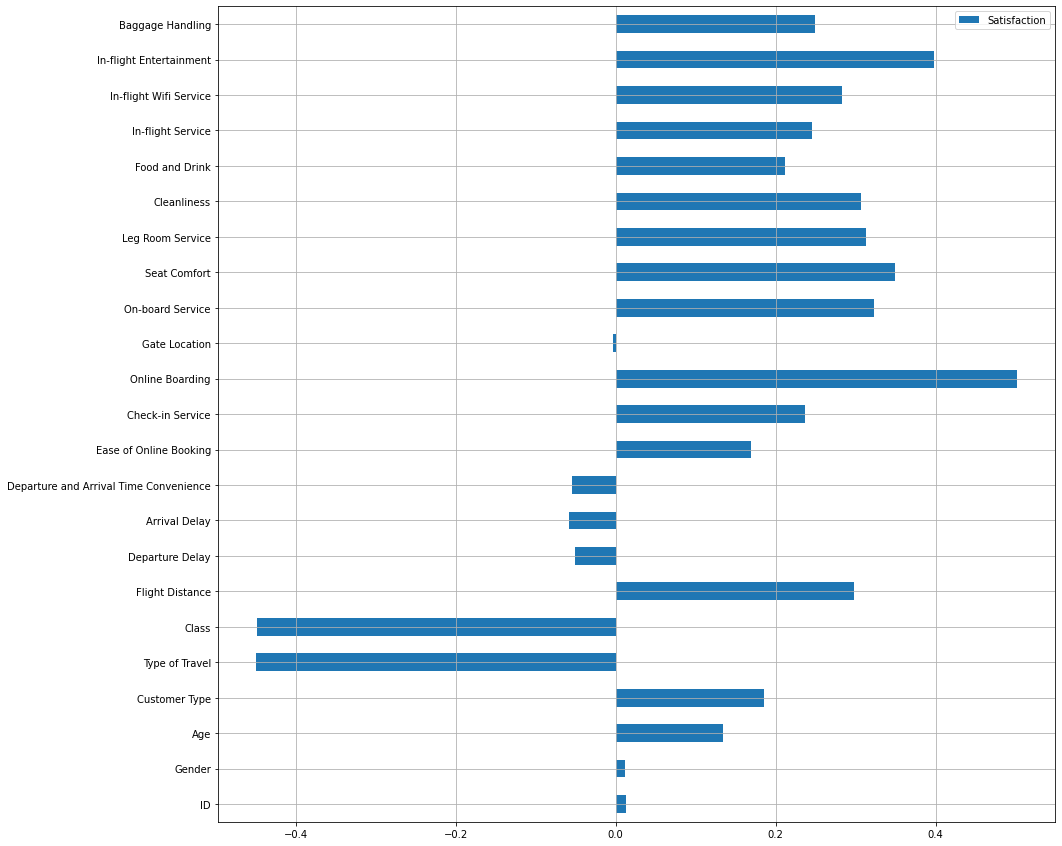

In [ ]:
corr = pd.DataFrame(airline_data.corr()['Satisfaction']).drop('Satisfaction',axis=0)
corr.plot(kind='barh',grid=True,figsize=(15,15))

In [ ]:
feature_columns = []
for x in corr.index:
 if corr.loc[x].values < -0.4:
   feature_columns.append(x)
 elif corr.loc[x].values > 0.2:
   feature_columns.append(x)

In [ ]:
print(feature_columns)

['Type of Travel', 'Class', 'Flight Distance', 'Check-in Service', 'Online Boarding', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']


In [ ]:
X = airline_data[feature_columns]
y = airline_data['Satisfaction']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [ ]:
X.shape

(129487, 14)

In [ ]:
y.shape

(129487,)

In [ ]:
x_train = X.iloc[:100001]

In [ ]:
y_train = y.iloc[:100001]

In [ ]:
x_test = X.iloc[100001:129488]

In [ ]:
y_test = y.iloc[100001:129488]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
lr_pred = lr.predict(x_test)

In [ ]:
print("Training Accuracy :", lr.score(x_train, y_train))
print("Testing Accuracy :", lr.score(x_test, y_test))


Training Accuracy : 0.8501414985850142
Testing Accuracy : 0.8721087973953741


In [ ]:
print('Logistic Regression Accuracy Score:',
accuracy_score(lr_pred,y_test))

Logistic Regression Accuracy Score: 0.8721087973953741


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)

In [ ]:
print("Training Accuracy :", dt.score(x_train, y_train))
print("Testing Accuracy :", dt.score(x_test, y_test))

Training Accuracy : 0.999980000199998
Testing Accuracy : 0.9393949671030319


In [ ]:
print('Decision Tree Accuracy Score:',
accuracy_score(dt_pred,y_test))

Decision Tree Accuracy Score: 0.9393949671030319


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

In [ ]:
print("Training Accuracy :", rf.score(x_train, y_train))
print("Testing Accuracy :", rf.score(x_test, y_test))

Training Accuracy : 0.999980000199998
Testing Accuracy : 0.9595401207352642


In [ ]:
print('Random Forest Accuracy Score :', rf.score(x_test,y_test))

Random Forest Accuracy Score : 0.9595401207352642


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [ ]:
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

In [ ]:
print("Training Accuracy :", xgb.score(x_train, y_train))
print("Testing Accuracy :", xgb.score(x_test, y_test))

Training Accuracy : 0.9278407215927841
Testing Accuracy : 0.9412602591060164


In [ ]:
print('XGB Accuracy Score:', accuracy_score(xgb_pred,y_test))

XGB Accuracy Score: 0.9412602591060164
